## Група 4:
## Криволап Дмитро
## Остапюк Наталія
## Свердлов Денис
## Шовковий Владислав

## Завдання 2

#### У таблиці наведено дані ДержСтату про основні показники ведення лісогосподарської діяльності.
#### 1.	Провести дескриптивний та візуальний аналіз:
####      a. Обчислити вибіркові характеристики (середнє, медіана, дисперсія, інтерквартильний розмах), знайти вибіркову кореляційну матрицю.
####      b.	Для наборів спостережень побудувати графіки типу «вусатих коробочок» 
####      c.	Побудувати матричну діаграму розсіювання, обрати залежну величину Y та набір факторів X1,X2,…,Xp для подальшого регресійного аналізу.
####     d.	Оцінити параметри лінійної регресії залежності величини (Y) від обраних факторів (X) та проаналізувати результати (адекватність, можливість побудови прогнозу). 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from copy import deepcopy

data = pd.read_csv('data.csv', encoding='ISO-8859-1', sep = ";")
data.columns = ['Роки','Обсяги продукції','Площа рубок','Заготівля деревини','Кількість пожеж','Площа спалених земель','Згорілий ліс','Збитки', 'Площа відтворення']

data


,Роки,Обсяги продукції,Площа рубок,Заготівля деревини,Кількість пожеж,Площа спалених земель,Згорілий ліс,Збитки,Площа відтворення
0,1997,373.0,403100,10597.0,2309,1467,11806,615.4,38.5
1,1998,396.6,435400,10548.7,3915,4418,123034,4555.7,36.7
2,1999,521.3,434600,10308.7,6070,5532,163858,5822.3,38.6
3,2000,744.4,455100,11261.7,3696,1610,20249,1367.6,37.8
4,2001,824.2,570300,12022.3,3205,3772,139604,6204.3,42.6
5,2002,946.8,376591,12826.8,6383,4983,59206,3378.9,45.9
6,2003,1108.9,383191,15953.3,4527,2817,19720,1817.5,48.3
7,2004,1594.6,468648,17300.7,1876,595,1944,428.7,53.9
8,2005,1991.1,484673,17124.3,4223,2325,32101,3535.0,58.6
9,2006,2451.1,468188,17759.8,3842,4287,53119,5917.6,66.7


### a.	Обчислити вибіркові характеристики (середнє, медіана, дисперсія, інтерквартильний розмах), знайти вибіркову кореляційну матрицю.

,Обсяги продукції,Площа рубок,Заготівля деревини,Кількість пожеж,Площа спалених земель,Згорілий ліс,Збитки,Площа відтворення
count,20.000000,20.000000,20.000000,20.00000,20.000000,2.000000e+01,20.000000,20.000000
mean,3691.700000,428200.300000,16570.280000,3666.55000,4788.450000,1.771651e+05,23668.020000,58.210000
std,3548.543466,49028.002296,3994.064643,1714.86395,4364.899715,2.904296e+05,43248.396435,14.646102
min,373.000000,357949.000000,10308.700000,1113.00000,418.000000,1.944000e+03,428.700000,36.700000
25%,916.150000,396067.500000,12625.675000,2272.50000,1574.250000,2.011675e+04,2866.300000,45.075000
50%,2703.700000,419377.500000,17494.100000,3754.50000,3720.000000,9.112000e+04,5869.950000,59.500000
75%,5734.000000,458372.000000,19750.550000,4299.00000,5529.750000,1.839555e+05,25196.900000,70.100000
max,12838.800000,570300.000000,22612.800000,7036.00000,14691.000000,1.304271e+06,188412.000000,80.900000
Interquantile_range,4817.850000,62304.500000,7124.875000,2026.50000,3955.500000,1.638388e+05,22330.600000,25.025000


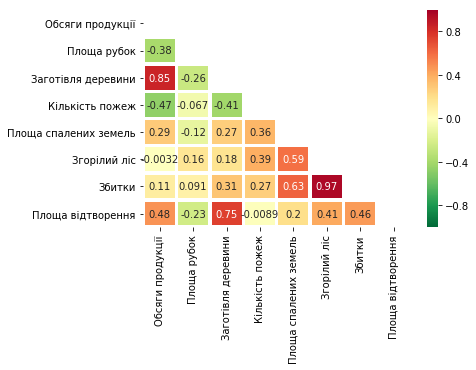

In [2]:
#Correlation heatmap
corr = data.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
seaborn.heatmap(corr, cmap = 'RdYlGn_r', vmax = 1., vmin = -1., mask = mask, linewidth = 2.5,annot=True)

summary = data.iloc[:,1:].describe()
summary.loc['Interquantile_range'] = (summary.iloc[6,:] - summary.iloc[4,:]).tolist()
data1 = deepcopy(data.iloc[:,1:])
summary


Видно дуже високу кореляцію між збитками і об'ємом згорілого лісу, а також між обсягом продукції і об'ємом заготовленою деревини

### Вусаті коробочки

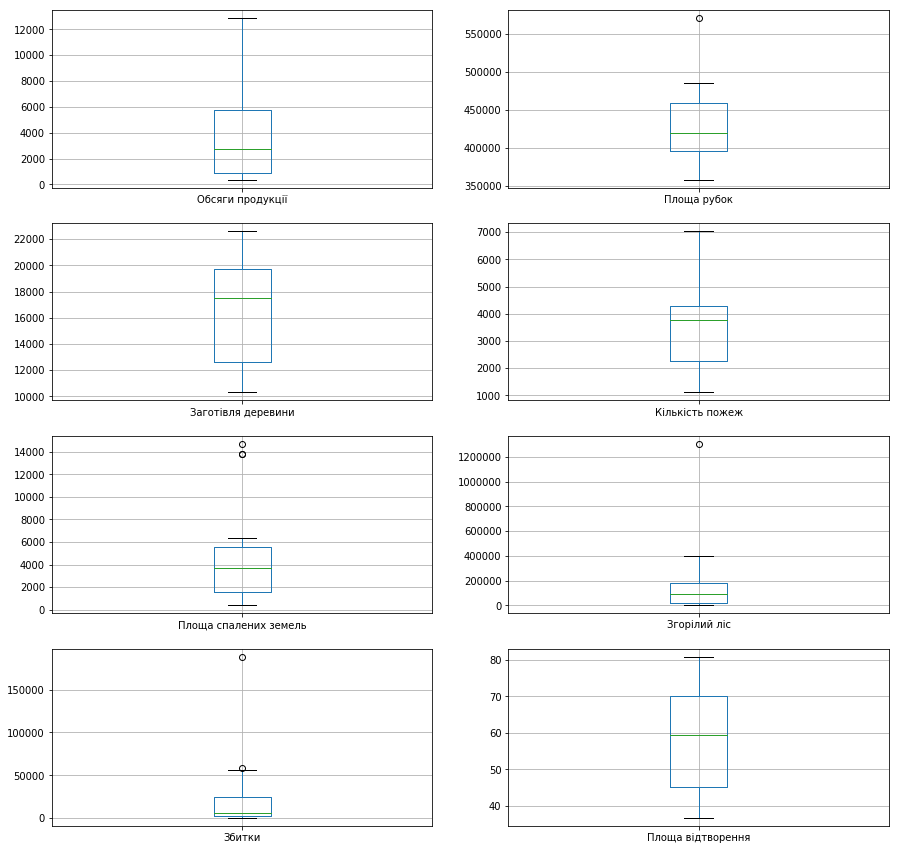

In [3]:
fig, axis = plt.subplots(4, 2, figsize=(15, 15))
i = 0
for col in data1.columns:
    data1.boxplot(col,ax = axis[int(i/ 2),i %2])
    i+=1

<Figure size 792x432 with 0 Axes>

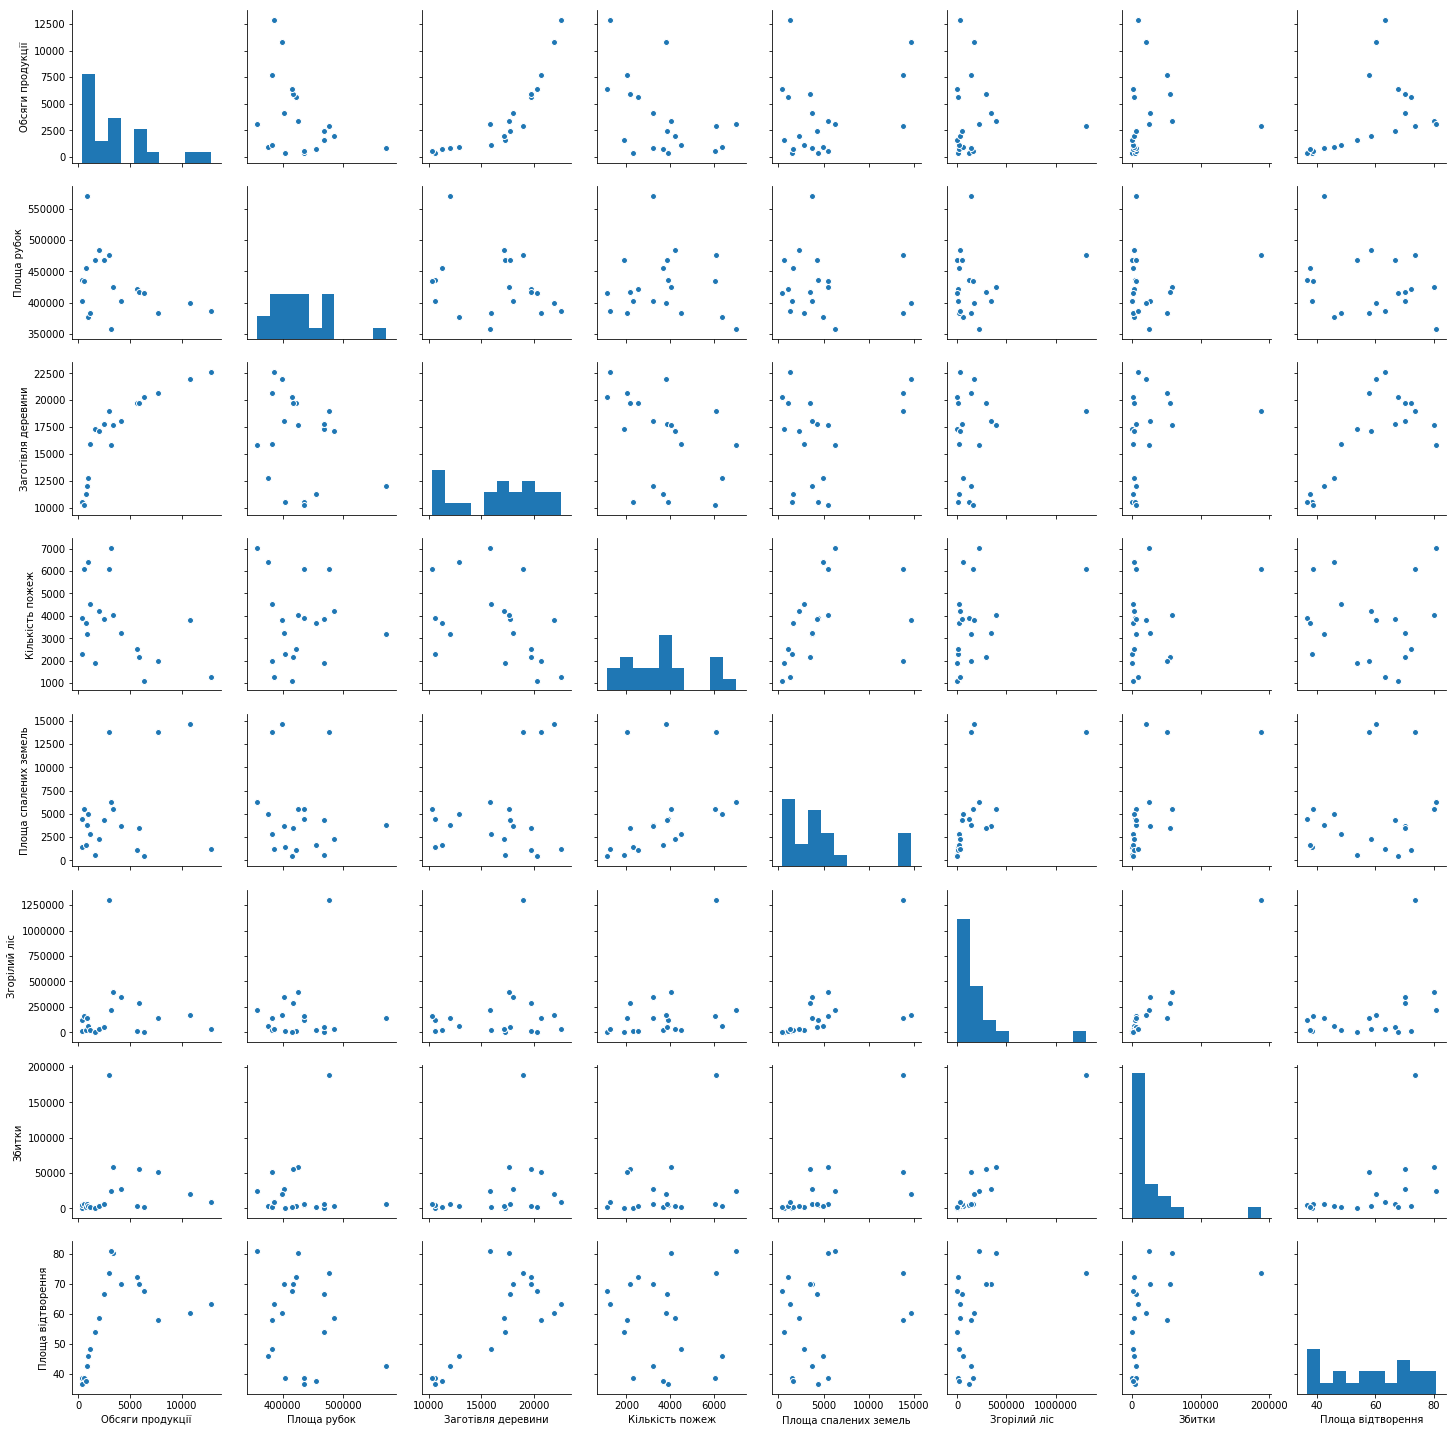

In [4]:
plt.figure(figsize=(11,6))
#seaborn.pairplot(data.iloc[:,1:5])
#seaborn.pairplot(data.iloc[:,[1,5,6,7,8]],diag_kind = 'kde')
seaborn.pairplot(data.iloc[:,1:9])

З діаграм розсіювання простежується явно можна побачити тільки залежність обсягу продукуції від об'єму заготівлі деревини. 

#### Часові ряди

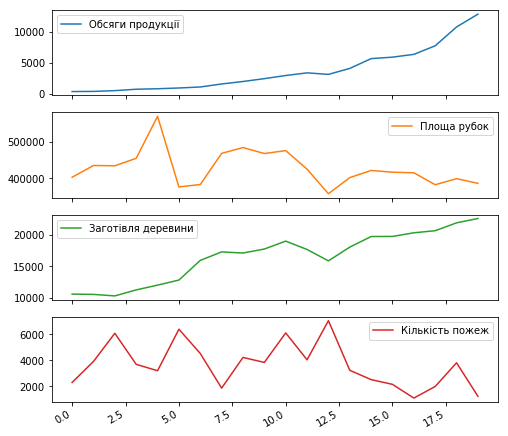

In [5]:
data.iloc[:,1:5].plot(subplots=True, figsize=(8, 8)); plt.legend(loc='best')

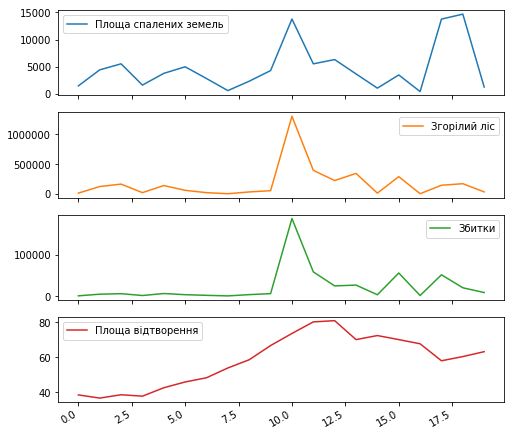

In [6]:
data.iloc[:,5:].plot(subplots=True, figsize=(8, 8)); plt.legend(loc='best')

### Вибір залежної змінної

Очевидно, що обсяг продукції знаходиться в прямій залежності від об'єму заготовленої деревини - якщо ми знаємо об'єм заготівлі, то нам уже не важливі дані про пожежі і інші фактори, які в нас наявні. Тому є сенс передбачати саме об'єм заготівлю. Також ми робимо припущення, що на об'єм заготівлі впливає обсяг реалзізованої продукції в минулому році - тому додаємо цю змінну як один з можливих факторів.

### Regression

In [7]:
import statsmodels.api as sm 


### Відбір факторів для регресії

Зразу відкидаємо фактор 'Збитки', оскільки вона дуже корелює з фактором 'Згорілий ліс'. Додаємо, як можливий фактор лаг - обсяг реалізованою продукцію в минулому році

Відбір факторів для моделі проведемо з точки зору максимізації **R-квадрат**(коефіціент детермінації - частка дисперсії залежної змінної, яка пояснюєтья моделью залежності) та мінімазації **AIC** (інформаційний критерій Акаіке - оцінює кількість втраченої інформації для даної моделі)

Оскільки кількість факторів невелика, то вибір моделі можно зробити за допомогою повного перебору всіх можливих комбінацій факторів

In [8]:
names = summary.iloc[:,1:].columns.tolist()
names.remove('Збитки')
names.remove('Заготівля деревини')
names.append('lag')
names

['Площа рубок',
 'Кількість пожеж',
 'Площа спалених земель',
 'Згорілий ліс',
 'Площа відтворення',
 'lag']

In [9]:
lag = pd.Series(data['Обсяги продукції'], name='production') 
lag = lag.shift(+1) 
data['lag'] = lag
data = data.dropna()
data

,Роки,Обсяги продукції,Площа рубок,Заготівля деревини,Кількість пожеж,Площа спалених земель,Згорілий ліс,Збитки,Площа відтворення,lag
1,1998,396.6,435400,10548.7,3915,4418,123034,4555.7,36.7,373.0
2,1999,521.3,434600,10308.7,6070,5532,163858,5822.3,38.6,396.6
3,2000,744.4,455100,11261.7,3696,1610,20249,1367.6,37.8,521.3
4,2001,824.2,570300,12022.3,3205,3772,139604,6204.3,42.6,744.4
5,2002,946.8,376591,12826.8,6383,4983,59206,3378.9,45.9,824.2
6,2003,1108.9,383191,15953.3,4527,2817,19720,1817.5,48.3,946.8
7,2004,1594.6,468648,17300.7,1876,595,1944,428.7,53.9,1108.9
8,2005,1991.1,484673,17124.3,4223,2325,32101,3535.0,58.6,1594.6
9,2006,2451.1,468188,17759.8,3842,4287,53119,5917.6,66.7,1991.1
10,2007,2956.3,476241,19013.9,6100,13787,1304271,188412.0,73.6,2451.1


In [18]:
#Stepwise, subset selection
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.1, 
                       threshold_out = 0.061, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
#             if verbose:
# #                 print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
result = stepwise_selection(data[names], data['Заготівля деревини'])

print('resulting features:')
print(result)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


### Простой перебор

In [ ]:
import itertools
combinations = []
for L in range(0, len(names)+1):
    for subset in itertools.combinations(names, L):
        combinations.append(subset)
for i in range(len(combinations)):
    combinations[i] = list(combinations[i])
combinations = combinations[1:]

In [ ]:
values = []
models = []
r = []
for i in range(len(combinations)):
    x1 = data[combinations[i]]
    x1 = sm.add_constant(x1)
    model = sm.OLS(data['Заготівля деревини'], x1)
    results = model.fit() 
    values.append(results.aic)
    r.append(results.rsquared)
    models.append(combinations[i])
models_all = pd.DataFrame({'models' : models,
 'rsquared' : r,
 'AIC':values
  }, columns=['models','rsquared', 'AIC'])
models_all

### Заготівля деревини

In [ ]:
X = data[['Площа відтворення', 'Кількість пожеж','Площа спалених земель','lag']]
X = sm.add_constant(X)
model = sm.OLS(data['Заготівля деревини'], X, missing='drop')
results = model.fit() 
print(results.summary())

### Перевірка умов теореми Гауса-Маркова

#### Нормальність залишків

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
resid_st_x1 = OLSInfluence(results).resid_studentized_external
fig = qqplot(resid_st_x1, line='45')
plt.show()

#### Однорідність залишків

In [ ]:
plt.scatter(results.fittedvalues, resid_st_x1)

In [ ]:
print("Тест Уайта lm_pvalue: ",het_white(results.resid, results.model.exog)[1])

За результатами теста Уайта не відхиляємо гіпотезу про однорідність залишків

#### Автокореляція залишків

Статистика критерій Дарбіна-Уотсона дорівнює 0.924, що не дозволяє прийняти гіпотезу про некорельованість залишків